In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

sns.set_style('whitegrid')
sns.set_palette('Set2')
sns.color_palette('Set2')

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

## Load Dataset
We'll be using the Iris dataset for this exercise. The dataset contains 3 classes:

- 0 - Iris-Setosa 
- 1 - Iris-Versicolour 
- 2 - Iris-Virginica 

We will also be splitting the dataset into train and test sets.

In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

X, y = datasets.load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Original Size | Input: {X.shape}, Output: {y.shape}")
print(f"Train Set Size | Input: {X_train.shape}, Output: {y_train.shape}")
print(f"Test Set Size | Input: {X_test.shape}, Output: {y_test.shape}")

Original Size | Input: (150, 4), Output: (150,)
Train Set Size | Input: (120, 4), Output: (120,)
Test Set Size | Input: (30, 4), Output: (30,)


## Visualize the data

In [3]:
train_set = np.concatenate((X_train, y_train.reshape(-1,1)), axis=1)
df_train = pd.DataFrame(train_set, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target'])
df_train['target'] = df_train['target'].astype(int)

test_set = np.concatenate((X_test, y_test.reshape(-1,1)), axis=1)
df_test = pd.DataFrame(test_set, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target'])
df_test['target'] = df_test['target'].astype(int)

df_train.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,4.6,3.6,1.0,0.2,0
1,5.7,4.4,1.5,0.4,0
2,6.7,3.1,4.4,1.4,1
3,4.8,3.4,1.6,0.2,0
4,4.4,3.2,1.3,0.2,0


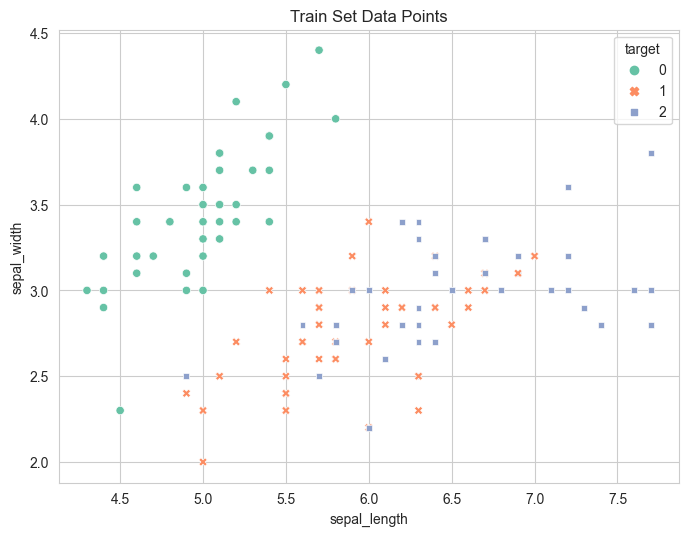

In [4]:
plt.figure(figsize=(8,6), dpi=100)
sns.scatterplot(data=df_train, x='sepal_length', y='sepal_width', hue='target', style='target', palette="Set2")
plt.title('Train Set Data Points')
plt.show()

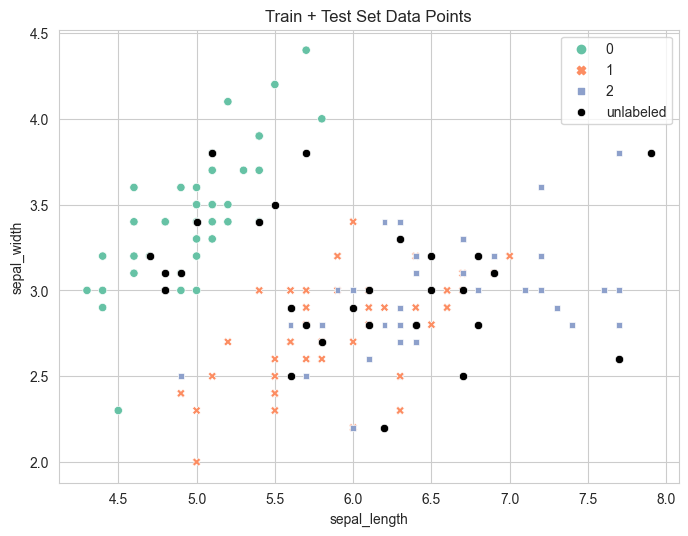

In [5]:
plt.figure(figsize=(8,6), dpi=100)

sns.scatterplot(data=df_train, x='sepal_length', y='sepal_width', hue='target', style='target', palette="Set2")
sns.scatterplot(data=df_test, x='sepal_length', y='sepal_width', color='black', label='unlabeled')

plt.title('Train + Test Set Data Points')
plt.show()

# Implmenting KNN Classifier 

In the next section we will be implementing the KNN Algorithm and classify the type of iris plant. To do this we need to correctly implement the following code block.

```
def classify(X, y, point, k):
    '''
        Returns the classification of a new data point
        
        Parameters
            X: training features 
            y: training labels/target 
            point: test data point to be classified by the model
            k: number of neighbors to look into to classify the data
    '''
    indices = get_nearest_neighbors(X, point, k=3)
    labels = y[indices]
    label = Counter(labels).most_common(1)[0][0]
    return label
```

Reference for pseudocode of KNN Algorithm:

1. Load the data
2. Initialize K (# of neighbors to consider) 
3. For each training datapoint:
     - Calculate distance between training data and test data 
     - Add distance and index of test data to an ordered collection 
4. Sort ordered collection from smallest to largest based on distance 
5. Pick first K entries from sorted collection 
6. Get labels of selected entries and get label majority


## Exercise: Implement Distance Measurement

 - Implement Minkowski distance. 
 - Replace ```raise NotImplementedError``` with your code. 


For reference, here are the formulas for some distance measurements:

 - Manhattan Distance
$$Dist(\bar{X}, \bar{Y}) = \sum_i |x_i - y_i|$$

 - Euclidean Distance
$$Dist(\bar{X}, \bar{Y}) = \sqrt{\sum_i (x_i - y_i)^2}$$

 - Minkowski Distance
$$Dist(\bar{X}, \bar{Y}) = ({\sum_i |x_i - y_i|^p})^{1/p}$$


In [15]:
def minkowski(X, point, p:int=2) -> list:
    
    return (np.abs(X-point)**p).sum(axis=1)**(1/p)
    '''
    Returns a list of distances of each elements in X from the reference point.

    Parameters:
    X: training features whose data type is numpy array
    point: single data point part of the test data 
    p: type of distance measure 2 for euclidean and 1 for manhattan
    '''
    raise NotImplementedError

In [17]:
from numpy.testing import assert_almost_equal

point = X_test[0]
distances = minkowski(X_train, point)
assert_almost_equal(distances[:20], [4.192851058647326, 3.6878177829171555, 0.7615773105863913, 3.558089374931439, 3.950949253027682, 
                                     0.8426149773176357, 0.6164414002968983, 3.5411862419251547, 3.706750598570128, 3.7349698793966195, 
                                     0.8660254037844383, 0.7549834435270751, 0.734846922834954, 3.72827037646145, 3.5411862419251547, 
                                     1.2489995996796794, 0.5385164807134502, 1.0862780491200217, 0.648074069840786, 2.345207879911715])

## Exercise: Get Nearest Neighbors

In [23]:
def get_nearest_neighbors(X, point, k:int) -> list:
    '''
    Returns list of  indices of nearest neighbors 

    X: training features whose data type is numpy array
    point: single data point part of the test data 
    k: number of neighbors to look into to classify the data
    '''
    distances = minkowski(X, point)
    
    return list(np.argsort(distances)[:k])
    
    #hint google np.argsort
    raise NotImplementedError

In [25]:
point = X_test[0]
indices = get_nearest_neighbors(X, point, k=3)
assert indices == [73, 63, 91]

## Exercise: Classify!

In [26]:
from collections import Counter

def classify(X, y, point, k:int):
    '''
    Returns the classification of a new data point
    '''
    indices = get_nearest_neighbors(X, point, k)
    labels = y[indices]
    label = Counter(labels).most_common(1)[0][0]
    return label
    #hint use the Counter library to get the most common label
    raise NotImplementedError

In [27]:
assert classify(X_train, y_train, point, k=3) == 1

### Test if our predictions match the actual...

In [32]:
def calculate_accurcay(y_pred, y_test):
    '''
    Calculates the accuracy of the model
    
    y_pred: Model prediction
    y_test: Actual labels
    '''
    return sum(y_pred == y_test)/len(y_test)

    
    raise NotImplementedError

In [33]:
y_pred = [classify(X_train, y_train, p, k=2) for p in X_test]
y_pred == y_test
print(f"Score: {calculate_accurcay(y_pred, y_test):.2%}")

Score: 100.00%


## Plot actual and predicted

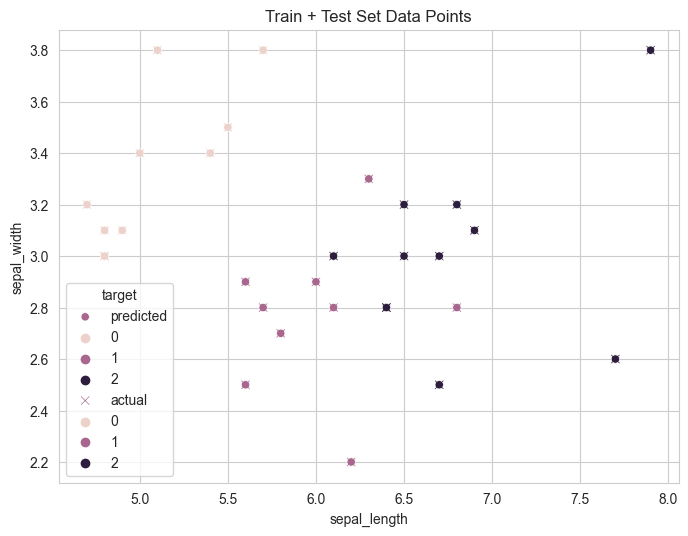

In [35]:
plt.figure(figsize=(8,6), dpi=100)

# sns.scatterplot(data=df_train, x='sepal_length', y='sepal_width', hue='target', style='target', palette="Set2")
sns.scatterplot(data=df_test, x='sepal_length', y='sepal_width', hue='target', label='predicted')
sns.scatterplot(data=df_test, x='sepal_length', y='sepal_width', hue='target', marker='x', label='actual')

plt.title('Train + Test Set Data Points')
plt.show()